<xarray.Dataset> Size: 4MB
Dimensions:            (y: 448, x: 304)
Dimensions without coordinates: y, x
Data variables:
    sea_ice_thickness  (y, x) float32 545kB ...
    snow_depth         (y, x) float32 545kB ...
    snow_density       (y, x) float32 545kB ...
    lat                (y, x) float32 545kB ...
    lon                (y, x) float32 545kB ...
    freeboard          (y, x) float32 545kB ...
    roughness          (y, x) float32 545kB ...
    ice_con            (y, x) float32 545kB ...
Attributes:
    Title:        NASA GSFC CryoSat-2 sea ice thickness and ancillary data
    Abstract:     This data set contains monthly averaged Arctic sea ice thic...
    Projection:   CryoSat-2 elevation data have a nominal footprint size of 3...
    Start_date:   20210401
    Start_time:   000242
    End_date:     20210430
    End_time:     234809
    Institution:  NASA Goddard Space Flight Center
    PI_name:      For questions related to this data set please contact the P...
    Referen

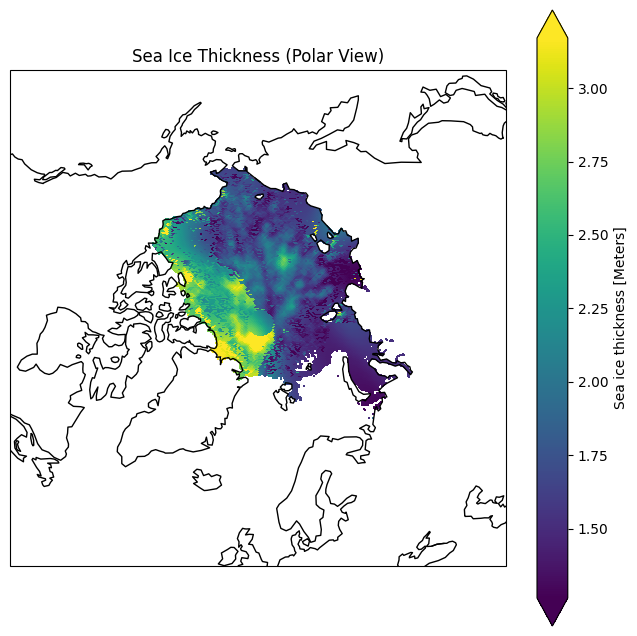

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
# Load the netCDF file
ds1 = xr.open_dataset("2021\RDEFT4_20210430.nc")
# Print dataset details
print(ds1)
# Extract the variable
sea_ice = ds1["sea_ice_thickness"]

# Mask out fill values (e.g., -9999 or -999) AND ensure >= 0
sea_ice_valid = sea_ice.where(sea_ice != -9999).where(sea_ice != -999).where(sea_ice >= 0)
print("Min:", sea_ice_valid.min().item(), "Max:", sea_ice_valid.max().item())
# Step A: rename the dims to something consistent if needed
sea_ice_valid = sea_ice_valid.rename(y="y", x="x")

# Step B: assign lat/lon as coordinates
sea_ice_valid = sea_ice_valid.assign_coords(
    lat=(("y", "x"), ds1["lat"].values),
    lon=(("y", "x"), ds1["lon"].values)
)
fig = plt.figure(figsize=(8, 8))
# Use Orthographic or NorthPolarStereo for a polar view
ax = plt.subplot(
    1, 1, 1,
    projection=ccrs.Orthographic(central_longitude=0, central_latitude=90)
)

# Plot data, telling Cartopy that lat/lon are in PlateCarree
sea_ice_valid.plot(
    ax=ax,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    cmap="viridis",
    robust=True  # helps if data range is small
)

ax.coastlines()
# Focus on the Arctic (latitude 50N - 90N)
ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())

plt.title("Sea Ice Thickness (Polar View)")
plt.show()